# Шаг 4. Визуализация

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Фрагмент кода взят отсюда: "https://tproger.ru/translations/python-data-vizualization/"
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import cufflinks

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

# это только для того, чтобы грузились превью на гитхабе. В общем случае лучше убрать
import plotly.io as pio

pio.renderers.default = 'png'

## Импорт датафрейма

In [2]:
df = pd.read_csv('df_after_step03.csv', index_col=0)
df

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,workday,first_workday,second_workday
09.10.2008,26.1629,767.98,11.0,1.40,637.93,700.37,100.91,100.867301,workday,0,0
10.10.2008,26.0695,743.23,11.0,1.40,0.00,700.37,100.91,100.867301,workday,0,0
13.10.2008,26.0695,743.23,11.0,1.40,700.37,666.37,100.91,100.867301,workday,1,0
14.10.2008,26.1111,726.16,11.0,1.40,666.81,755.22,100.91,100.867301,workday,0,1
15.10.2008,26.0871,712.49,11.0,1.40,755.22,689.71,100.91,100.867301,workday,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22.02.2023,74.8596,4442.45,7.5,4.65,2215.43,2212.40,100.46,99.631358,workday,0,0
24.02.2023,74.8596,4442.45,7.5,4.65,2209.10,2208.03,100.46,99.631358,day off,0,0
27.02.2023,74.8596,4442.45,7.5,4.65,2194.39,2241.10,100.46,99.631358,workday,1,0
28.02.2023,75.4323,4391.92,7.5,4.65,2246.26,2253.16,100.46,99.631358,workday,0,1


### Визуализация

Подгрузив таблицу, можно сразу посмотреть на все возможные связи между нашими переменными и их распределение.

In [64]:
plt.style.use("ggplot")

In [66]:
sns.set_theme(style="whitegrid", palette="husl")

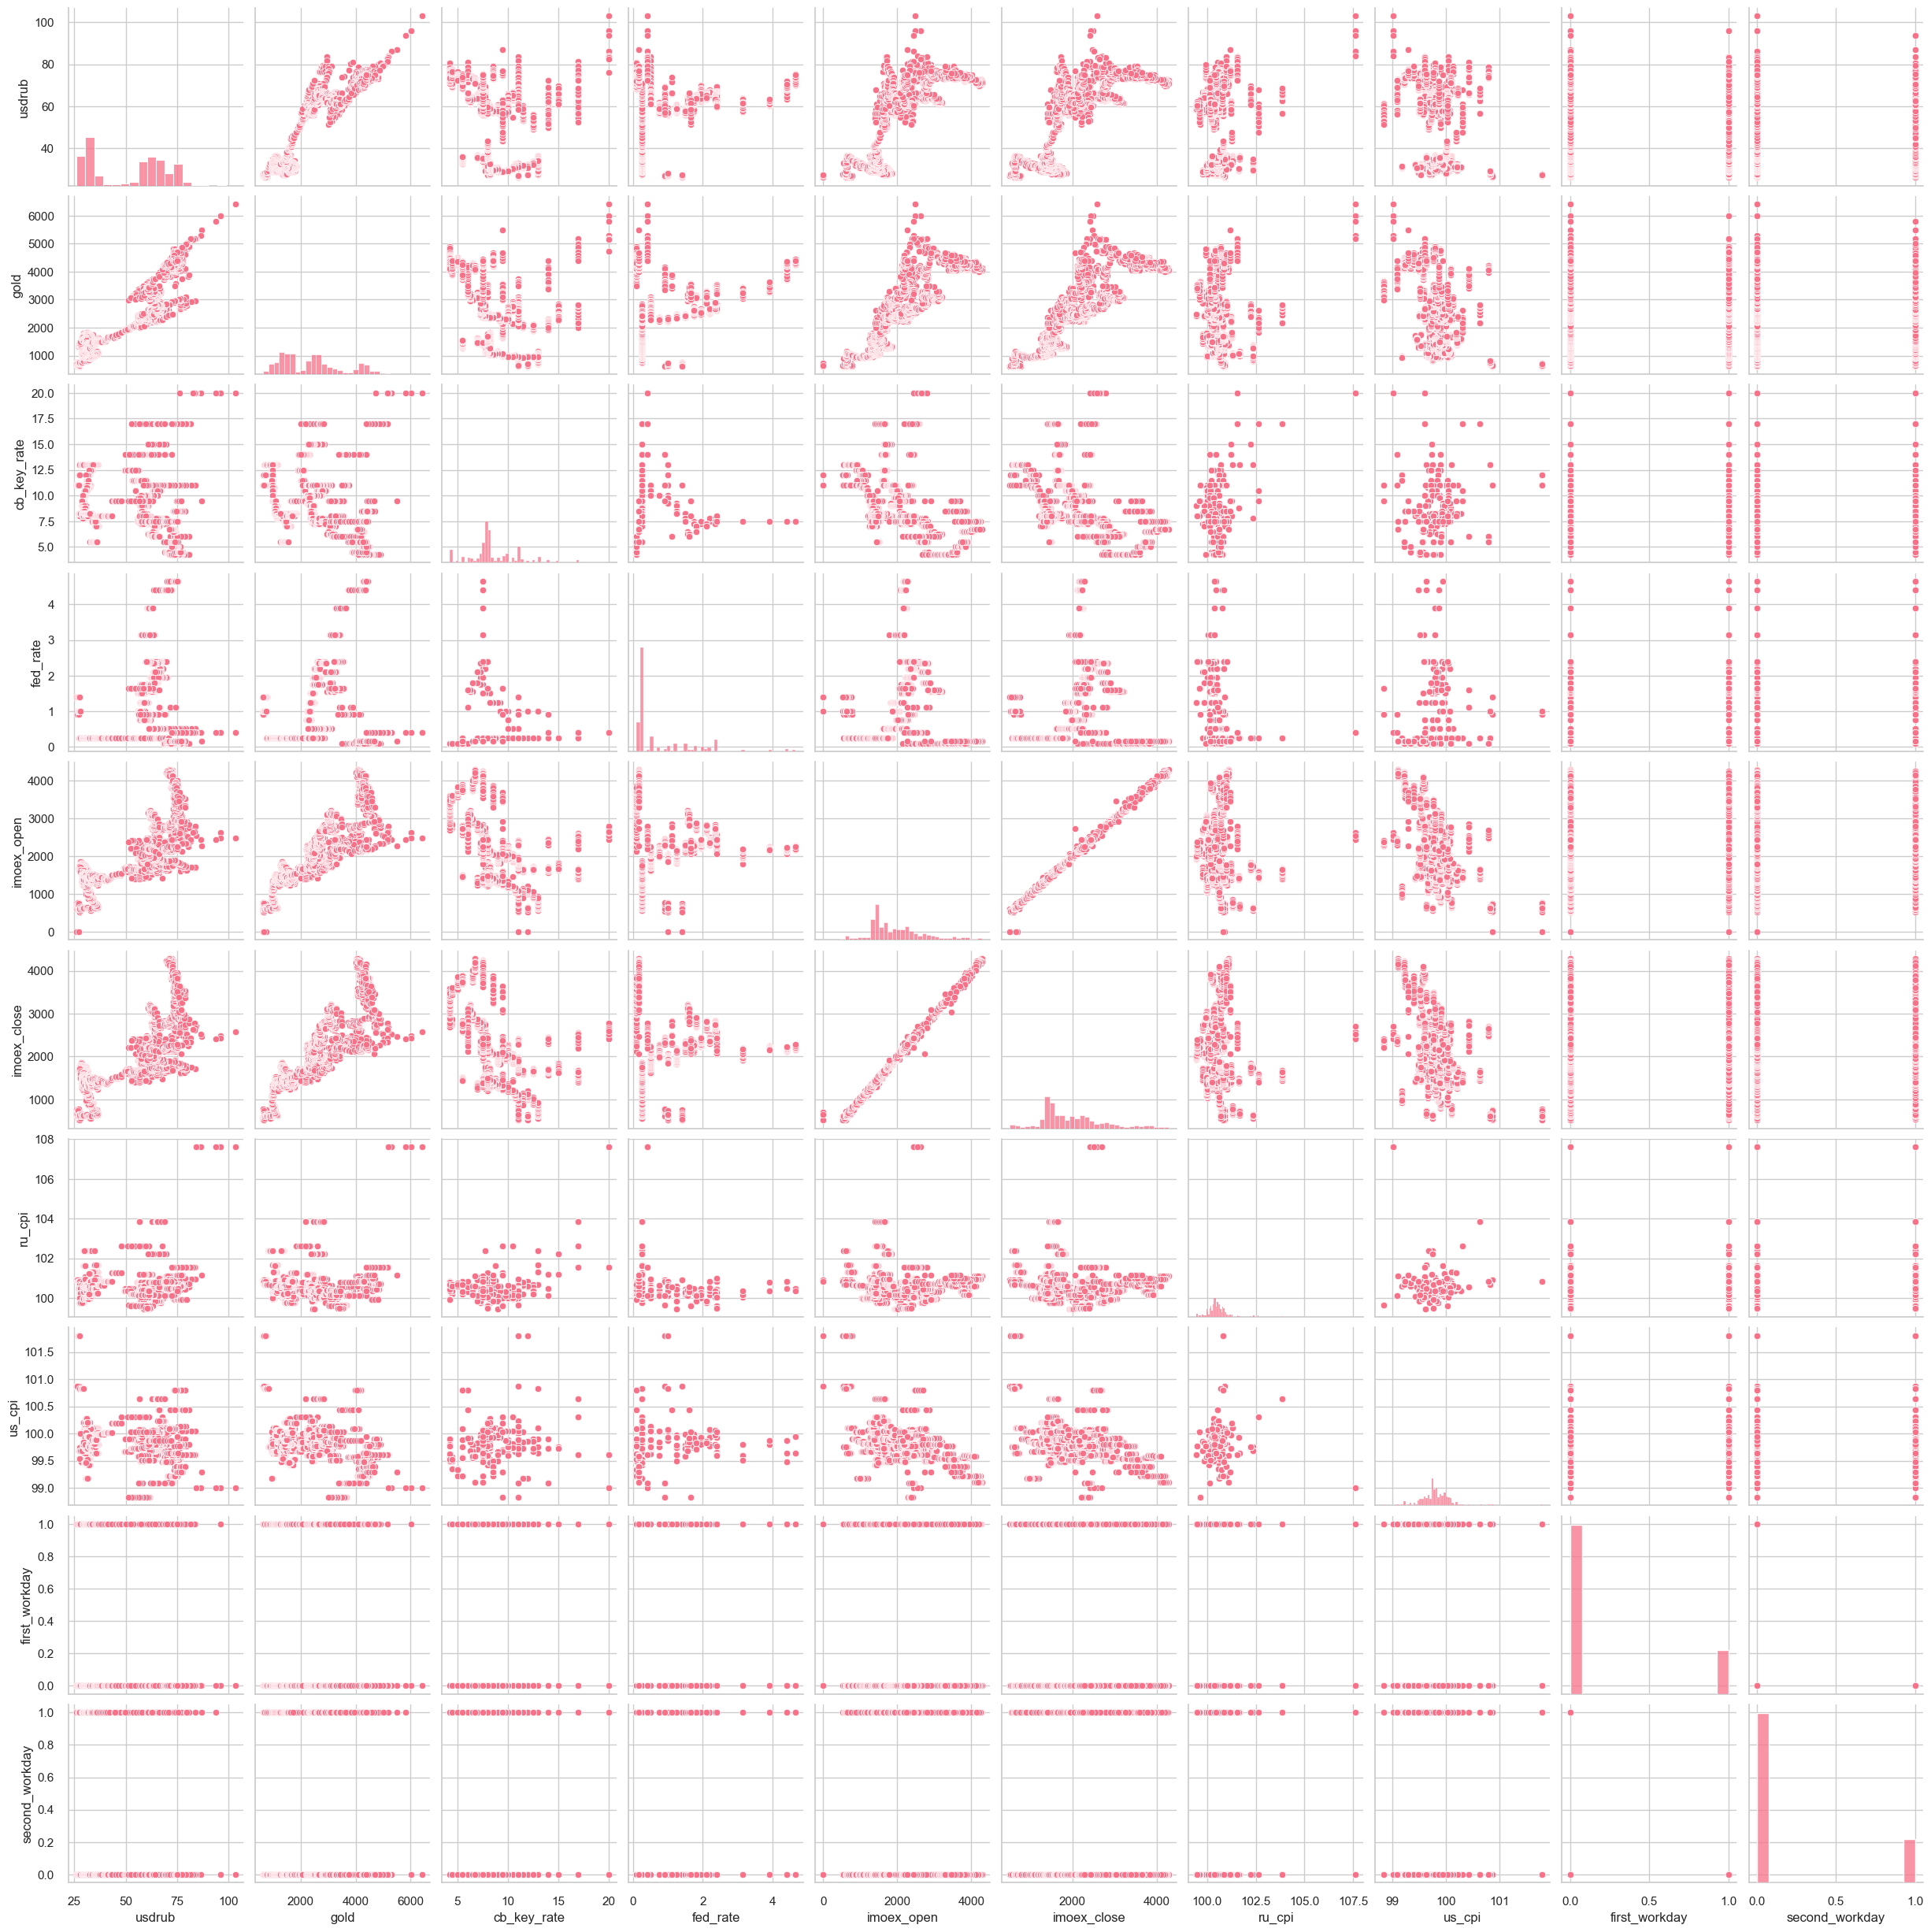

In [68]:
sns.pairplot(df);

> Рассмотрев все связи на графиках рассеяния, самую сильную можно увидеть у переменных цены открытия и закрытия IMOEX (что вполне логично).

Что касается нашей целевой переменной, то выглядит так, будто самая сильная связь у курса доллар/рубль и золота. Стоит это проверить.

In [5]:
#! pip install --upgrade pandas

In [6]:
correlation = df.corr(numeric_only=True)
correlation

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,first_workday,second_workday
usdrub,1.000000,0.901684,-0.128703,0.347139,0.788417,0.789214,0.008999,-0.229352,-0.010135,-0.006680
gold,0.901684,1.000000,-0.324880,0.268689,0.878536,0.878582,-0.008028,-0.362570,-0.010706,-0.007845
cb_key_rate,-0.128703,-0.324880,1.000000,-0.123849,-0.494193,-0.494998,0.401680,0.192116,0.001790,0.004145
fed_rate,0.347139,0.268689,-0.123849,1.000000,0.202072,0.203659,-0.218481,-0.011780,-0.000904,-0.000730
imoex_open,0.788417,0.878536,-0.494193,0.202072,1.000000,0.998931,-0.107074,-0.453852,-0.008901,-0.008200
imoex_close,0.789214,0.878582,-0.494998,0.203659,0.998931,1.000000,-0.106389,-0.450978,-0.009393,-0.008024
ru_cpi,0.008999,-0.008028,0.401680,-0.218481,-0.107074,-0.106389,1.000000,0.118933,-0.004723,-0.006082
us_cpi,-0.229352,-0.362570,0.192116,-0.011780,-0.453852,-0.450978,0.118933,1.000000,-0.011469,-0.011429
first_workday,-0.010135,-0.010706,0.001790,-0.000904,-0.008901,-0.009393,-0.004723,-0.011469,1.000000,-0.257202
second_workday,-0.006680,-0.007845,0.004145,-0.000730,-0.008200,-0.008024,-0.006082,-0.011429,-0.257202,1.000000


### Сделаем табличку покрасивее

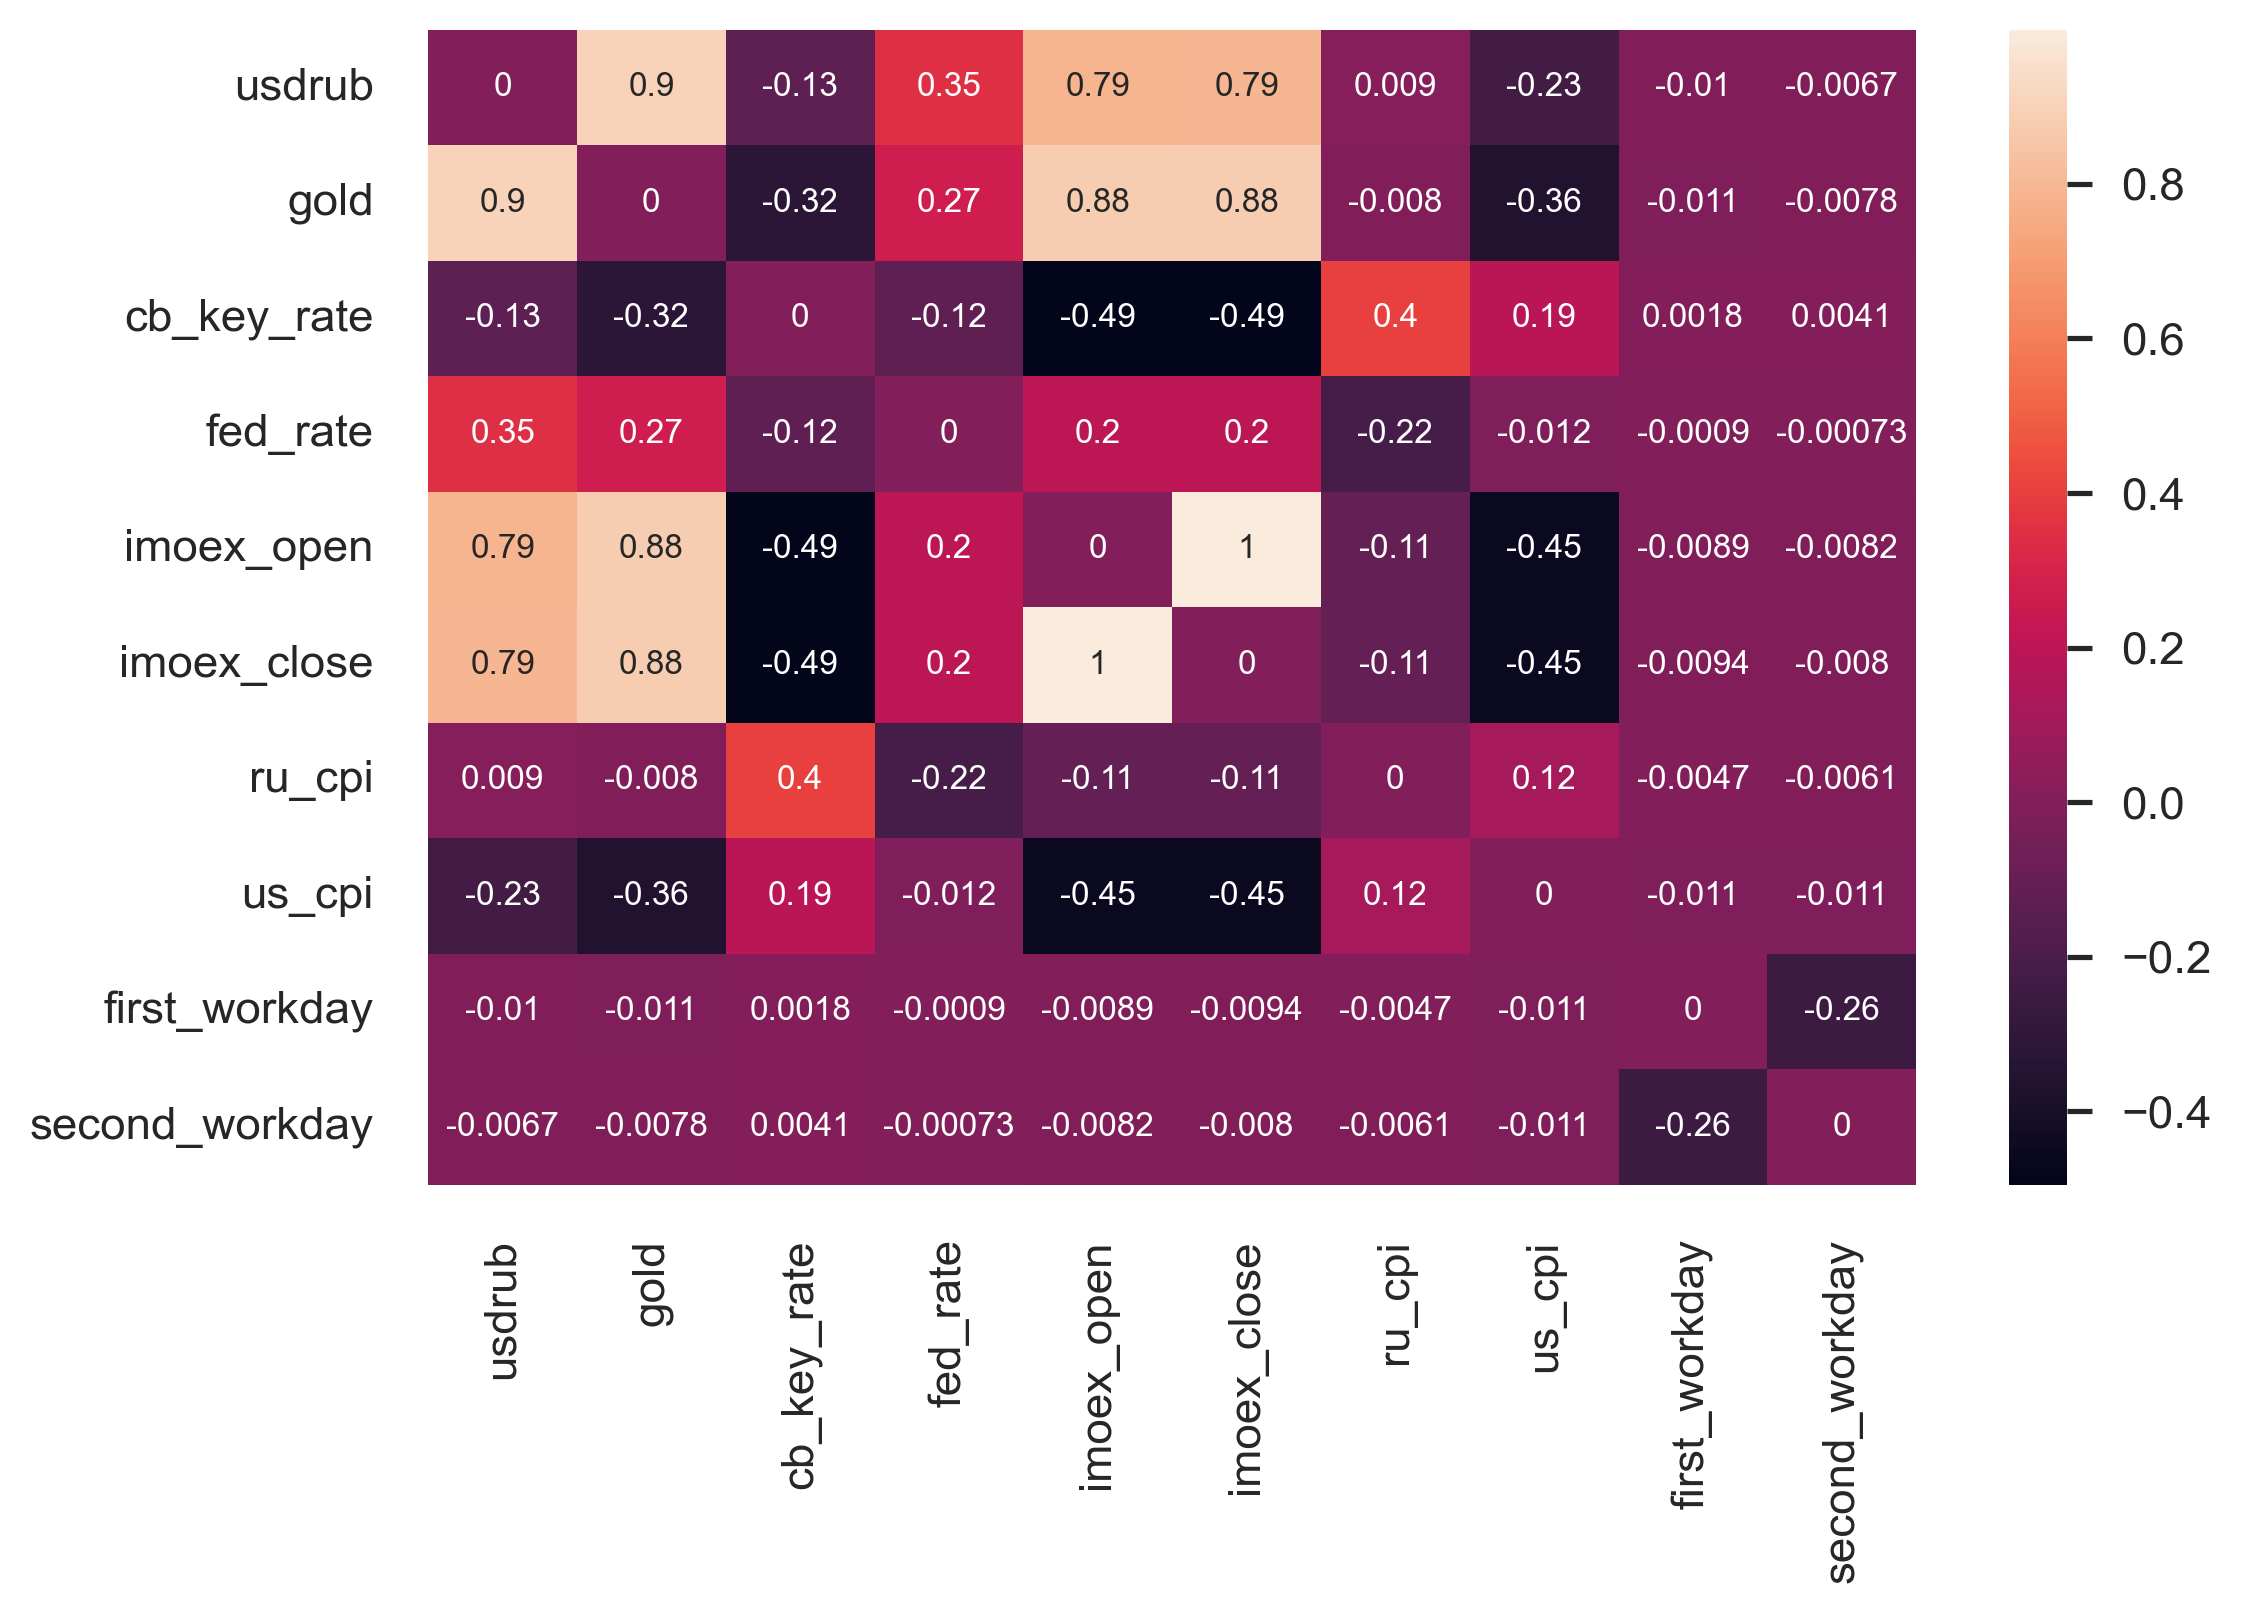

In [69]:
# Уберём корреляцию переменных самих с собой, чтобы не отвлекали взгляд
corr_graph = correlation - np.eye(correlation.shape[0])

plt.figure(figsize=(8, 5), dpi=300)
sns.heatmap(corr_graph, annot=True, annot_kws={'size': 8});

> Действительно, коэффициент корреляции между курсом доллар/рубль и ценой золота очень высокий, что говорит об их сильной линейной положительной связи. Кроме того из этой таблицы можно увидеть, что довольна высокая корреляция и у курса доллара с ценой IMOEX при открытии и закрытии. 

Для более наглядной визулизации уберем подпись корреляции, если она меньше 0.3 (значит, совсем слабая), а также покрасим в более интуитивные для восприятия цвета:

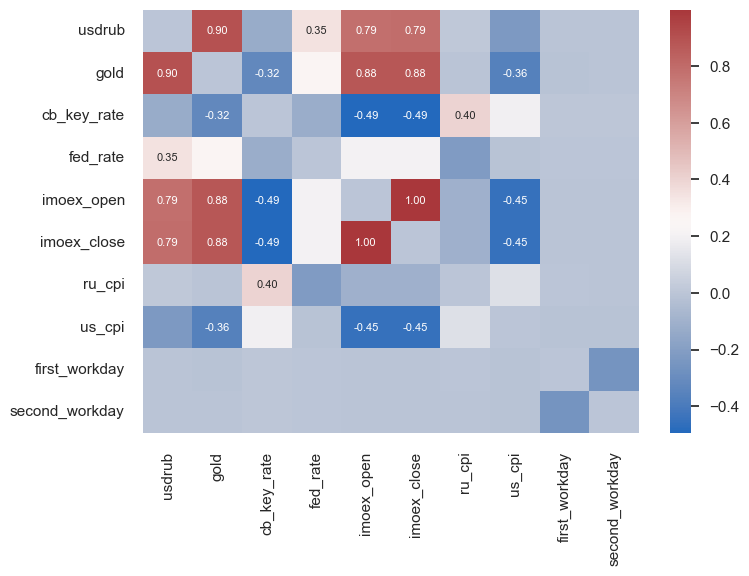

In [70]:
ax = sns.heatmap(corr_graph, cmap='vlag', annot=True, fmt='0.2f', annot_kws={'size': 8})
for t in ax.texts:
    if float(t.get_text())>=0.3 or float(t.get_text())<=-0.3:
        t.set_text(t.get_text()) 
    else:
        t.set_text("")

>Примечательно, что корреляция ипц с ключом слабее, чем индекса Мосбиржи с ключом. Из этого можно сформировать `гипотезу`, что значение ключевой ставки больше влияет на цены акций, чем на инфляцию. Неинтуитивная логика, верно? На следующем шаге работы будем ее проверять.

## Присмотримся к значениям 
Посмотрим на графике более детально диаграммы рассеяния самых коррелирующих между собой переменных

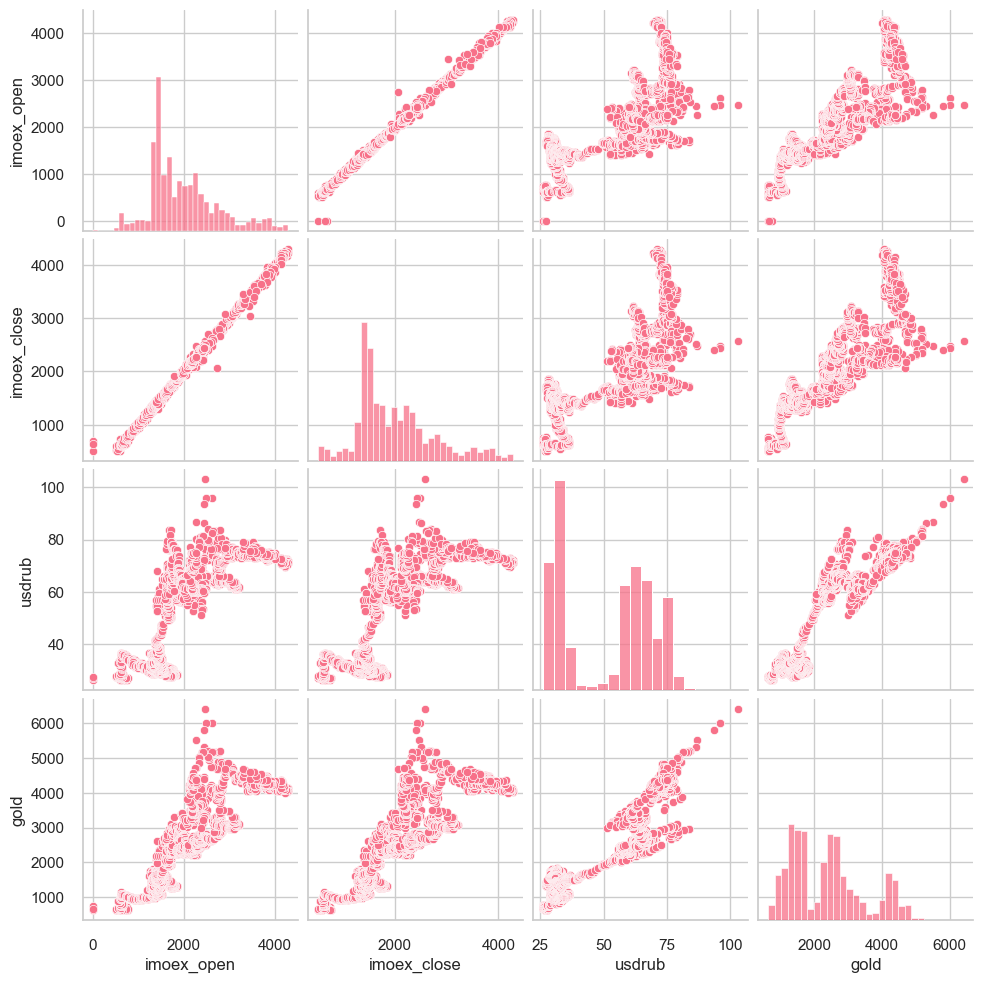

In [71]:
sns.pairplot(df[['imoex_open', 'imoex_close', 'usdrub', 'gold']]);

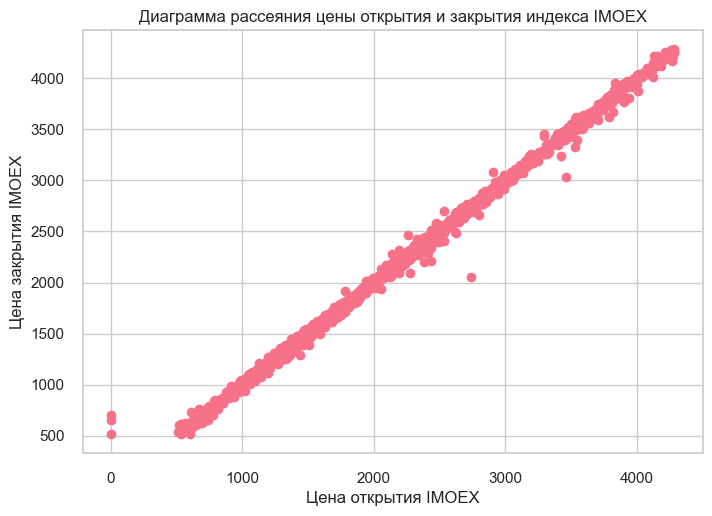

In [72]:
plt.scatter(df['imoex_open'], df['imoex_close'])
plt.xlabel('Цена открытия IMOEX')
plt.ylabel('Цена закрытия IMOEX')
plt.title('Диаграмма рассеяния цены открытия и закрытия индекса IMOEX');

>Видим ярко выраженную линейную связь. Из этого формируется `гипотеза`, что разница между ценой открыти и закрытия IMOEX стастистически не значима

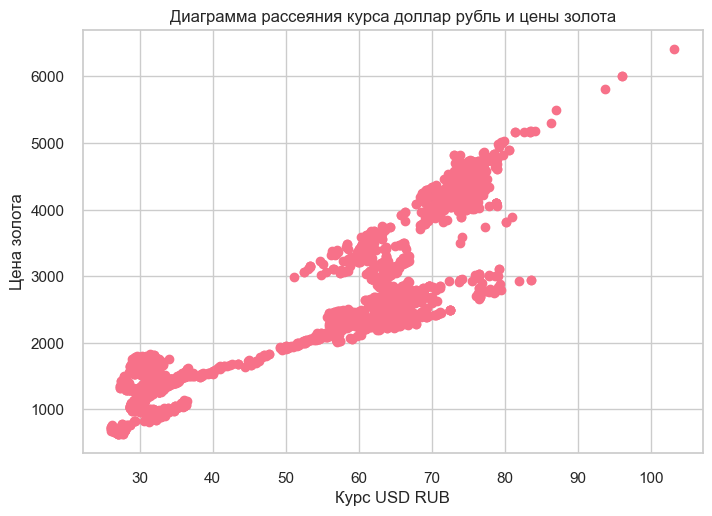

In [73]:
plt.scatter(df['usdrub'], df['gold'])
plt.xlabel('Курс USD RUB')
plt.ylabel('Цена золота')
plt.title('Диаграмма рассеяния курса доллар рубль и цены золота');

>Видим связь, которая очень близка к линейной. Получаем следующую `гипотезу`: самым значимым признаком при предсказывании курса доллар рубль является цена золота

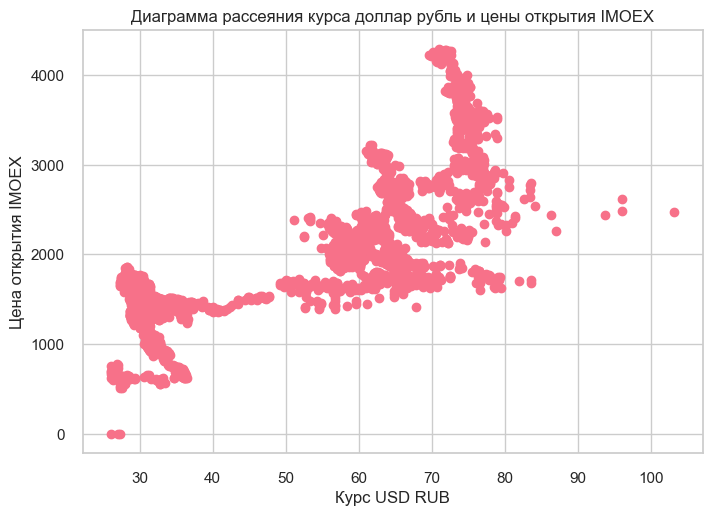

In [74]:
plt.scatter(df['usdrub'], df['imoex_open'])
plt.xlabel('Курс USD RUB')
plt.ylabel('Цена открытия IMOEX')
plt.title('Диаграмма рассеяния курса доллар рубль и цены открытия IMOEX');

>Тут уже свзяь не так похожа на линейную, как в предыдущих графиках, но тем не менее, видно, что точки не просто хаотично рассеяны.  Можно сформировать `гипотезу` о том, что цена открытия IMOEX - второй показатель (после цены золота), на который стоит опираться при предсказывании курса доллар рубль

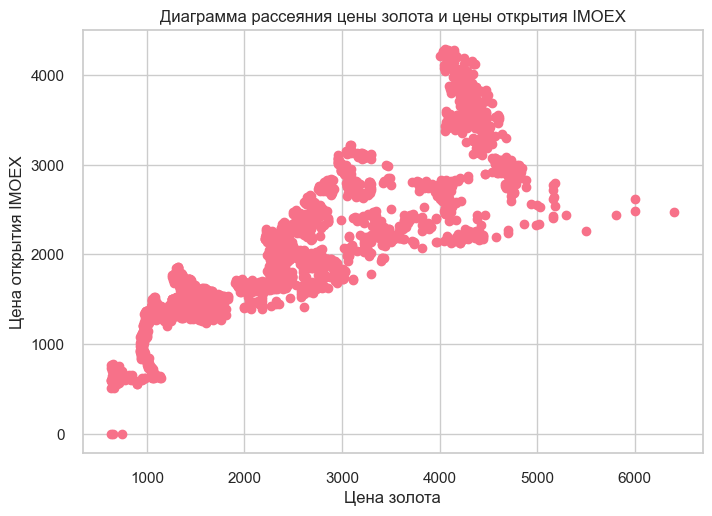

In [75]:
plt.scatter(df['gold'], df['imoex_open'])
plt.xlabel('Цена золота')
plt.ylabel('Цена открытия IMOEX')
plt.title('Диаграмма рассеяния цены золота и цены открытия IMOEX');

Пусть это и не имеет прямого отношения к нашей целевой переменной, можно проинтерпетировать данную выраженную линейную зависимость как еще одно обоснование того, что все три показателя: курс USD RUB, цена золота и цена открытия / закрытия IMOEX очень сильно коррелируют.

### Рассмотрим более слабые зависимости

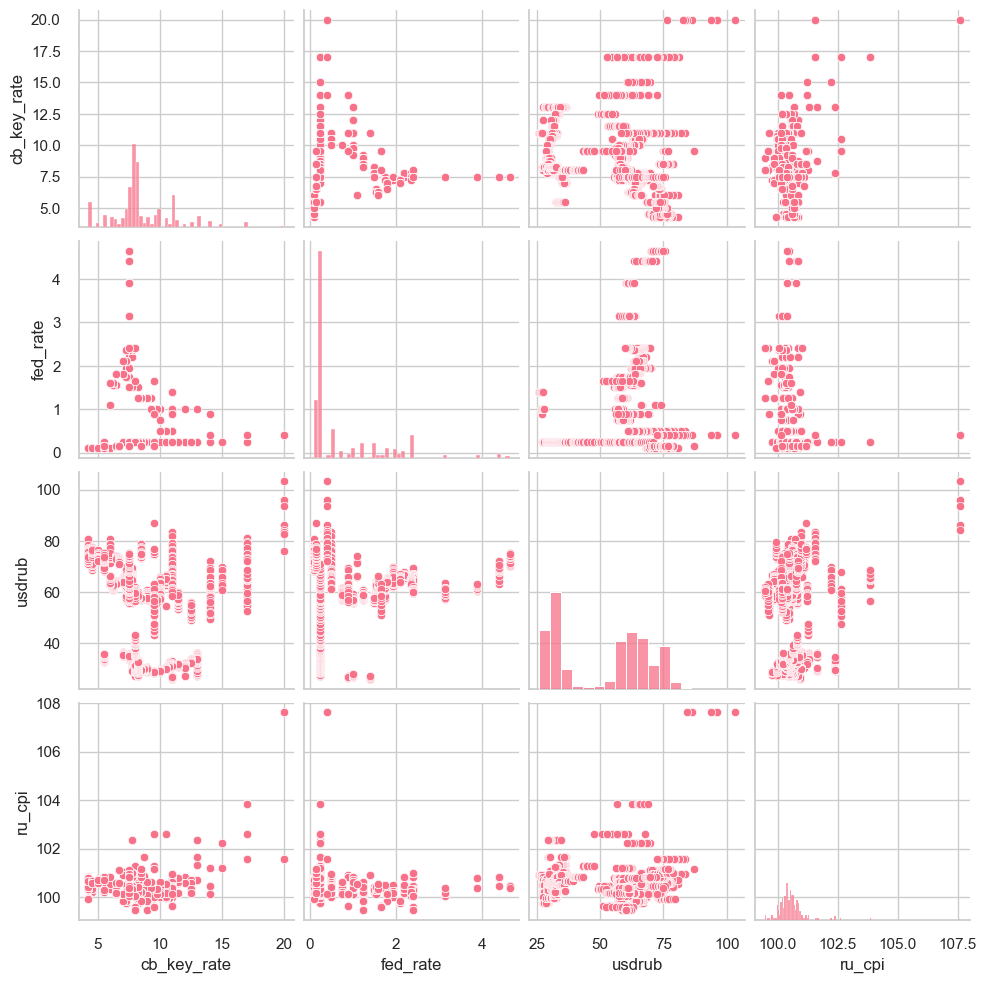

In [76]:
sns.pairplot(df[['cb_key_rate', 'fed_rate', 'usdrub', 'ru_cpi']]);

Как можно увидеть, сильных взаимосвзяей тут уже не наблюдается, однако хочется верить, что и эти признаки помогут лучше обучить нашу модель и сделать итоговые результаты более точными и полными

Также, раз уж мы анализируем в том числе и индекс IMOEX, имеет смысл посмотреть на его значения и понять, насколько вообще целесообразано делать вложения в него.

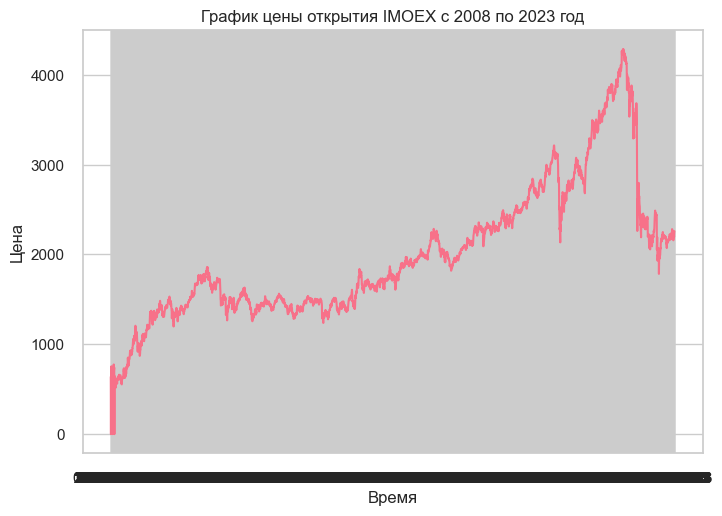

In [78]:
plt.plot(df['imoex_open'])
plt.title('График цены открытия IMOEX с 2008 по 2023 год')
plt.xlabel('Время')
plt.ylabel('Цена');

>Судя по графику можно предположить, что вкладываться в IMOEX в долгосрочной перспективе в целом выгодно, так как его цена до недавнего времени постоянно росла. Несмотря на то, что она начала падать на фоне разных событий в последнее время, мы хоти проверить `гипотезу` о том, что средняя доходность IMOEX больше нуля. Сделаем это на шаге 6

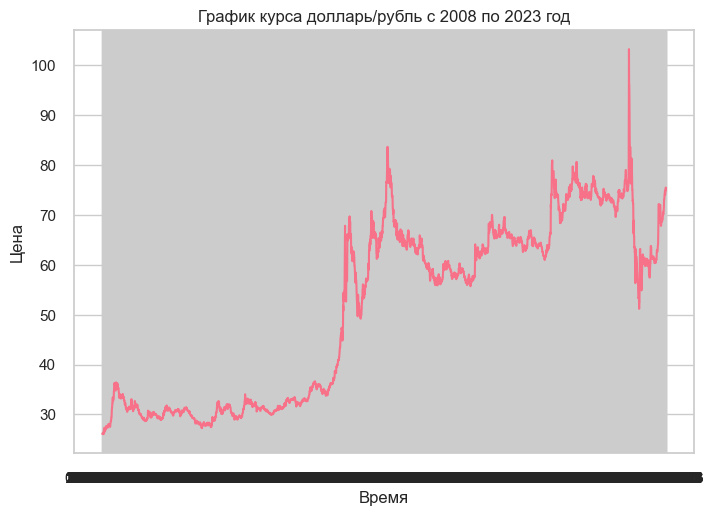

In [79]:
plt.plot(df['usdrub'])
plt.title('График курса долларь/рубль с 2008 по 2023 год')
plt.xlabel('Время')
plt.ylabel('Цена');

>Видим также и положительную тенденцию движения цены у доллара, что может наталкивать на мысль, что вложения в него выгодны. Проверим эту `гипотезу` точно так же, как и предыдующую, на шаге проверки гипотез

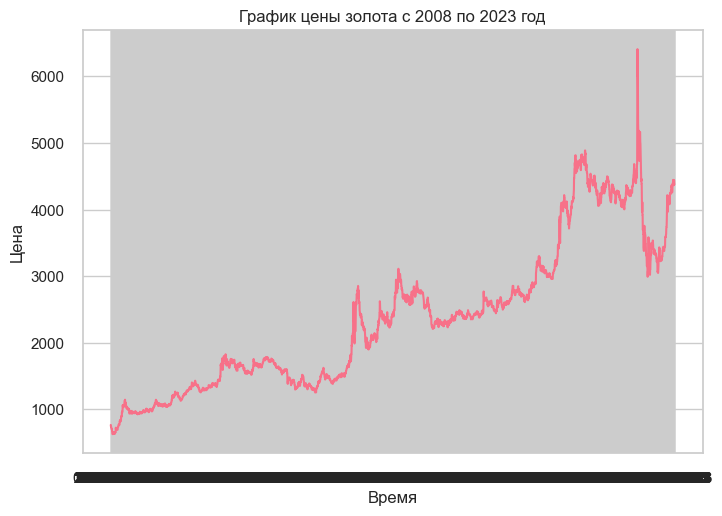

In [80]:
plt.plot(df['gold'])
plt.title('График цены золота с 2008 по 2023 год')
plt.xlabel('Время')
plt.ylabel('Цена');

> А может и вложения в золото точно окупают себя? Посмотрим, будет ли и их доходность больше нуля (очередная `гипотеза`)

### Можно поподробнее рассмотреть самую сильную из имеющихся связей  с помощью динамических графиков 

[для этого надо не импортировать plotly.io as pio и не ставить pio.renderers.default = 'png' в самой первой ячейке "Импорт необходимых библиотек", а также установить несколько дополнительных библиотек, прописанных в следующих строках]

In [15]:
#!pip install cufflinks

In [16]:
#!pip install -U kaleido

In [ ]:
df.iplot(x='usdrub',
         y='gold',
         categories='cb_key_rate',
         xTitle='Курс доллар/рубль',
         yTitle='Цена на золото',
         title='Зависимость цены золота от курса доллар/рубль')

> Видим корреляционную зависимость двух переменных, для красоты точки были раскрашены по ключевой ставке на то время

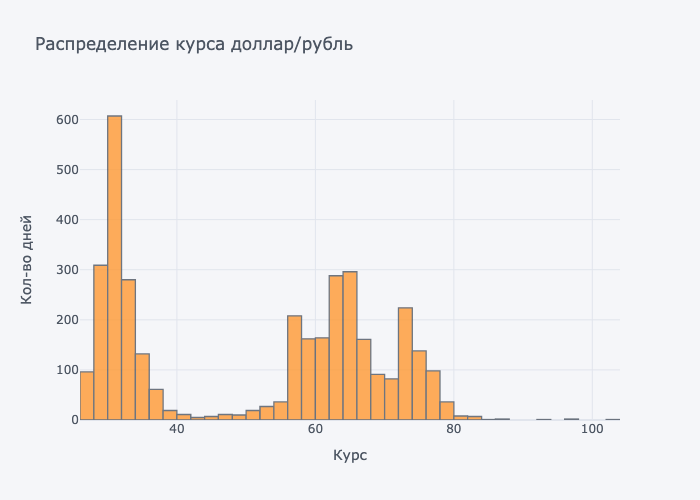

In [77]:
df['usdrub'].iplot(kind='hist',
                   xTitle='Курс',
                   yTitle='Кол-во дней',
                   title='Распределение курса доллар/рубль')

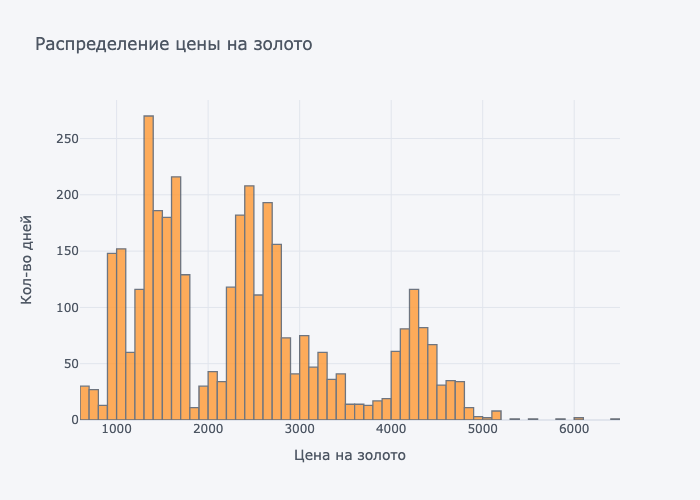

In [19]:
df['gold'].iplot(kind='hist',
                 xTitle='Цена на золото',
                 yTitle='Кол-во дней',
                 title='Распределение цены на золото')

> Такая сильная корреляция возможно из-за того, что и золото и курс валют имеют явно выраженные три интервала времени, когда их "цена" держалась в определённом диапазоне и в схожем друг на друга процентном соотношении от общей картины.
Можно сделать вывод, что именно в этот период происходило ослабление рубля как валюты, из-за чего рос и курс доллара и цена золота.

### Теперь посмотрим подробнее на связь usd/rub и цены IMOEX
Для удобства возьмём только цену открытия(они в любом случае очень похожи)

In [ ]:
df.iplot(x='usdrub',
         y='imoex_open',
         categories='cb_key_rate',
         xTitle='Курс доллар/рубль',
         yTitle='Цена открытия IMOEX',
         title='Зависимость цены открытия IMOEX от курса доллар/рубль')

>Тут корреляция менее наглядна, но тем не менее, видно, что точки не просто хаотично рассеяны.(Точки снова покрашены по ключевой ставке)

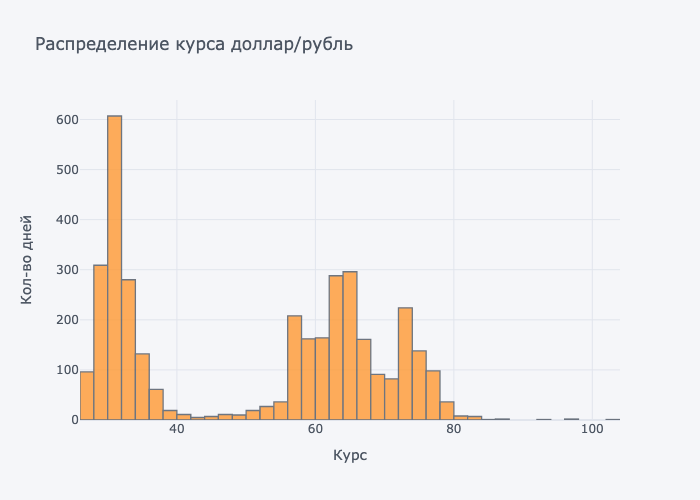

In [20]:
df['usdrub'].iplot(kind='hist',
                   xTitle='Курс',
                   yTitle='Кол-во дней',
                   title='Распределение курса доллар/рубль')

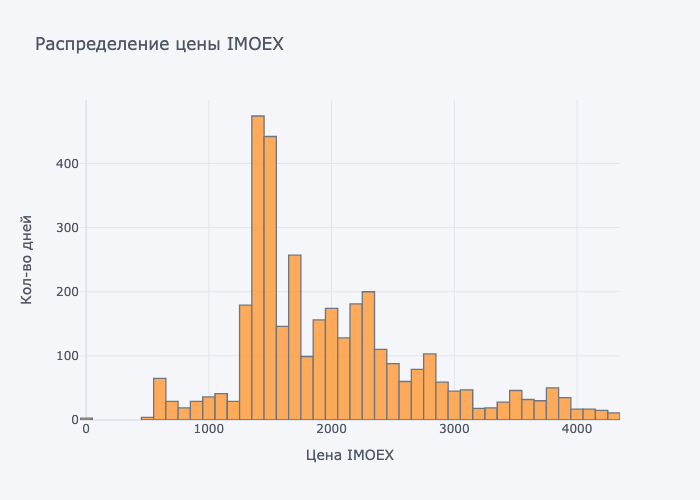

In [21]:
df['imoex_open'].iplot(kind='hist',
                       xTitle='Цена IMOEX',
                       yTitle='Кол-во дней',
                       title='Распределение цены IMOEX')

> Здесь корреляция видимо также существует за счёт выраженных пиков. Обычно, когда нестабильная ситуация на рынке, закупают доллары и продают акции, именно поэтому зачастую можно увидеть обесценение рубля и падение стоимости акций одновременно